In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx import (draw, DiGraph, Graph)

Import bowtie output file

In [3]:
alignedUMI = np.loadtxt("/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/Sequencing/Processed_data/BRAC5676.1h/trial/unzipped/barcodesplitter/bowtiealignment1_4.txt", dtype=int)

print(alignedUMI)


[[     1      1]
 [     2      2]
 [     2      3]
 ...
 [274748 274748]
 [274750 274750]
 [274751 274751]]


Now group according to connections within each row

In [4]:
G=nx.Graph()
G.add_edges_from(alignedUMI)
UMIs =(sorted(nx.connected_components(G), key = len, reverse=True))


For each set of aligned UMIs in list take the lowest UMI number as UMI label and the count number of UMIs in each set.

In [132]:
UMI_sorted = pd.DataFrame(columns=['line', 'UMI_frequency'])

for i in UMIs:

    UMI_sorted = UMI_sorted.append({'line': (min(i)), 'UMI_frequency': (len(i))},ignore_index=True)

In [136]:
print(UMI_sorted)

         line UMI_frequency
0       61625          2103
1      110953          1879
2      240603          1392
3      105316          1313
4      158753          1177
...       ...           ...
83421  274747             1
83422  274749             1
83423  274748             1
83424  274750             1
83425  274751             1

[83426 rows x 2 columns]


Remove UMI counts of less than 5

In [168]:
UMI_final = UMI_sorted[UMI_sorted.UMI_frequency >4]

In [169]:
UMI_final

,line,UMI_frequency
0,61625,2103
1,110953,1879
2,240603,1392
3,105316,1313
4,158753,1177
...,...,...
9139,274084,5
9140,274164,5
9141,274470,5
9142,274602,5


In [139]:
UMI_final.to_csv("/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/Sequencing/Processed_data/BRAC5676.1h/trial/unzipped/barcodesplitter/UMI_final.txt", header=None, index=None, sep=' ', mode='a')

Display sequence rank of UMIs to explore PCR bias

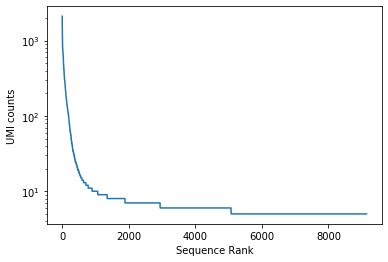

In [157]:
plt.figure()

plt.xlabel('Sequence Rank')
plt.ylabel('UMI counts')
l=  len(UMI_final)
x = list(range(0, l))



plt.semilogy(x, UMI_final['UMI_frequency'])

For each line in each UMI find associated barcode sequence, save final sequence and UMI count in txt file for final barcode alignment

In [158]:
barcodes = np.loadtxt("/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/Sequencing/Processed_data/BRAC5676.1h/trial/unzipped/barcodesplitter/TUR4405A1processedBC5_fasta.txt", dtype=str, delimiter = " ")


In [159]:
line = (barcodes[::2])
sequence = (barcodes[1::2])
line = np.char.strip(line, chars ='>')
barcode_seq = pd.DataFrame(columns = ['line', 'sequence'])
barcode_seq['line'] = line
barcode_seq['sequence'] = sequence

In [172]:
UMI_final['sequence'] = UMI_final.line.map(barcode_seq.sequence)

<ipython-input-172-45200ec6c447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UMI_final['sequence'] = UMI_final.line.map(barcode_seq.sequence)


In [173]:
UMI_final

,line,UMI_frequency,sequence
0,61625,2103,TATTTTGAGTAGTTGGCTCCTCATGCCGTTTTGTACTTCCTTTTTT...
1,110953,1879,GGGCGCGTACAGCAGACAATCATTCGGGTGCCGTACCATTTTTATT...
2,240603,1392,AGATATTCAGGGGGCCTCACTATCTGCTCGTTGTACTTCTTGTAAA...
3,105316,1313,GGTCAAGTGAGTGGTGGAGTGTGTATGAGCTCGTACTTTCACATTG...
4,158753,1177,CTCTTCTTTCCATCGTCTTTTTATTACCCGTACTGCTTTTTTGTTT...
...,...,...,...
9139,274084,5,AAAACTATATCAGCACACCCGCAGCCGTGTTCGTACTCTTGTTTTT...
9140,274164,5,AAAACTATATCAGCACACCCGCAGCCGTGTTCGTACTATCAATGGT...
9141,274470,5,AAAACTATATCAGCACACCCGCAGCCGTGTTCGTACATTCCTTCGT...
9142,274602,5,AAAACTATATCAGCACACCCGCAGCCGTGTTCGTACAATTATGTTT...


In [174]:
UMI_final.to_csv("/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/Sequencing/Processed_data/BRAC5676.1h/trial/unzipped/barcodesplitter/barcodes_UMI_final.txt", header=None, index=None, sep=' ', mode='a')